# Downloading the model deployed in IBM Watson Studio

In [1]:
# First go to anaconda prompt and do - "pip install ibm_watson_machine_learning"
!pip install ibm_watson_machine_learning

In [43]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",   # same for Dallas region
    "apikey":"o_qPYS7oi56jdZQy8-saRW9MKWQVsVBY1eZNCMXy2b3a" # to get it go to Manage --> Access(IAM)  --> API key --> create
}

client = APIClient(wml_credentials)

In [44]:
client

In [45]:
def guid_space_name(client,space_name):
    space=client.spaces.get_details()
    # print(space)
    return(next(item for item in space['resources'] if item['entity']['name']==space_name)['metadata']['id'])

In [46]:
space_uid=guid_space_name(client,'Forest_Fire_Deployment') # call above function ... using the space name
print("Space UID: "+space_uid)


Space UID: c312fc8b-30e2-4ca5-a89b-a627f0d904ad


In [47]:
client.set.default_space(space_uid) # make above space id as default space id

'SUCCESS'

In [49]:
client.repository.download('ab640e84-a777-4cd5-8627-dbd034b3b802','forest_cloud_download.tar.gz') # To download file and run in local system
                                                    # copy and paste model_id from IBM notebook to here

Successfully saved model content to file: 'forest_cloud_download.tar.gz'


'D:\\Jupyter Notebook\\FINAL FILES/forest_cloud_download.tar.gz'

## Testing model trained in IBM cloud

In [50]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [51]:
model = load_model("forest_fire.h5")

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

### With fire

In [53]:
img = image.load_img(r"fire_test1.jpg",target_size=(256,256))

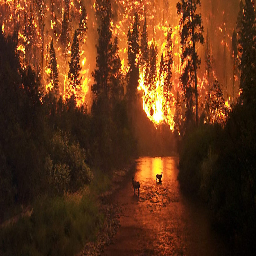

In [54]:
img

In [55]:
x = image.img_to_array(img)

In [56]:
type(x)

numpy.ndarray

In [57]:
x.shape

(256, 256, 3)

In [58]:
w = np.expand_dims(x,axis=0)
w.shape

(1, 256, 256, 3)

In [59]:
pred_prob = model.predict(w)

1/1 [==============================] - 0s 376ms/step


In [60]:
pred_prob

array([[1.]], dtype=float32)

In [61]:
if(pred_prob[0]==0):
    print('No fire is Detected')
else:
    print('Fire is Detected !')

Fire is Detected !


### Without fire

In [62]:
img1 = image.load_img(r"nofire_test1.jpg",target_size=(256,256))

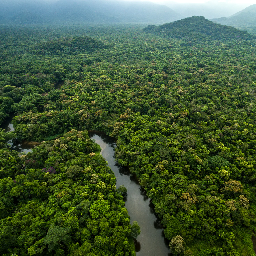

In [63]:
img1

In [64]:
y = image.img_to_array(img1)

In [65]:
w = np.expand_dims(y,axis=0)
w.shape

(1, 256, 256, 3)

In [66]:
pred_prob = model.predict(w)

1/1 [==============================] - 0s 41ms/step


In [67]:
pred_prob

array([[0.]], dtype=float32)

In [68]:
if(pred_prob[0]==0):
    print('No fire is Detected')
else:
    print('Fire is Detected !')

No fire is Detected
